Initial analysis of tropical precipitation in N96 u-cp288 (GA8/CoMorph) and u-cp308 (GA8 standard)
=====

Animations of stream h - tropical precip.

Note, videos are not displayed in the notebook. Instead, they are saved to a shared dropbox folder and linked to here.

Note, CoMorph does not output a convective precipitation diagnostic (convective_rainfall_flux), because it adds all of its precitation into the large-scale cloud scheme (see UMDP 043 for details).

In [1]:
from pathlib import Path
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import iris
import matplotlib
import matplotlib.pyplot as plt
# plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["animation.html"] = "html5"
import matplotlib.animation
from IPython.display import display, HTML

from mcs_prime.mcs_prime_config import PATHS
%matplotlib inline

In [2]:
# 3600: kg m-2 s-1 -> mm hr-1
precip_ctrl = iris.load_cube(PATHS['simdir'] / 'u-cp308/init_test/cp308a.ph1990aug.pp', 'precipitation_flux') * 3600
precip_ctrl.units = 'mm hr-1'

precip_comorph = iris.load_cube(PATHS['simdir'] / 'u-cp288/init_test/cp288a.ph1990aug.pp', 'precipitation_flux') * 3600
precip_comorph.units = 'mm hr-1'

/home/markmuetz/anaconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/pp.py:1563: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t1 = cftime.datetime(
/home/markmuetz/anaconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/pp.py:1598: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t2 = cftime.datetime(
/home/markmuetz/anaconda3/envs/mcs_prime_env/lib/python3.10/site-packages/cf_units/__init__.py:411: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  dates = np.array([dt and dt.replace(microsecond=0) for dt in dates])
/home/markmuetz/anaconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/pp.py:1563: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t1 = cftime.datetime(
/home/markmuetz/anaconda3/envs/mcs_prime_env/lib/python3.10/site-packages/iris/fileformats/pp.py:1598: UserWarning

In [3]:
lon = precip_ctrl.coord('longitude').points
lat = precip_ctrl.coord('latitude').points

cprecip_ctrl, clon = add_cyclic_point(precip_ctrl.data, coord=lon)
cprecip_comorph, clon = add_cyclic_point(precip_comorph.data, coord=lon)

In [4]:
levels = [0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
colors = ((0, 0, 0.6), 'b', 'c', 'g', 'y', (1, 0.5, 0), 'r', 'm', (0.6, 0.6, 0.6))

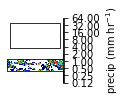

In [5]:
precip_max = max(cprecip_ctrl.max(), cprecip_comorph.max())
times = [c.point for c in precip_ctrl.coord('time').cells()]

fig, (ax1, ax2) = plt.subplots(2, 1, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches((1, 1))

cax = fig.add_axes([0.9, 0.05, 0.02, 0.9])
# Plot single frame to set colorbar properly.
im = ax2.contourf(clon, lat, cprecip_ctrl[0], levels=levels, colors=colors)
fig.colorbar(im, cax=cax, label='precip (mm hr$^{-1}$)')

def plot_precip_both(i):
    # print(i)
    ax1.clear()
    ax2.clear()
    t = times[i]
    ax1.text(0.5, 1.01, f'{t.year}/{t.month}/{t.day} {t.hour:02d}:{t.minute:02d}Z', va='bottom', ha='center',
             transform=ax1.transAxes)
    ax1.text(-0.03, 0.55, 'GA8.0 control (u-cp308)', va='bottom', ha='center',
             rotation='vertical', rotation_mode='anchor',
             transform=ax1.transAxes)
    ax1.text(-0.03, 0.55, 'GA8.0 CoMorph (u-cp288)', va='bottom', ha='center',
             rotation='vertical', rotation_mode='anchor',
             transform=ax2.transAxes)
    ax1.coastlines()
    ax2.coastlines()
    ax1.contourf(clon, lat, cprecip_ctrl[i], levels=levels, colors=colors)
    ax2.contourf(clon, lat, cprecip_comorph[i], levels=levels, colors=colors)

In [6]:
Writer = matplotlib.animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Mark Muetzelfeldt <mark.muetzelfeldt@reading.ac.uk>'), bitrate=-1)

In [7]:
fig.set_size_inches((24, 10))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.85, top=0.95, hspace=0.05)
anim = matplotlib.animation.FuncAnimation(fig, plot_precip_both, frames=24 * 3, interval=200)
animpath = PATHS['dropboxdir'] / 'u-cp308_u-cp288_19900801_timestep_animation.mp4'
anim.save(animpath, writer=writer)
display(HTML(f"""<a href="file://{animpath}">{animpath}</a>"""))

In [8]:
plt.rcParams["animation.embed_limit"] = 21091636 * 4
fig.set_size_inches((24, 10))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.85, top=0.95, hspace=0.05)
anim = matplotlib.animation.FuncAnimation(fig, plot_precip_both, frames=range(5, 24 * 3 * 30, 6), interval=200)
animpath = PATHS['dropboxdir'] / 'u-cp308_u-cp288_199008_animation.mp4'
anim.save(animpath, writer=writer)
display(HTML(f"""<a href="file://{animpath}">{animpath}</a>"""))